<a href="https://colab.research.google.com/github/coderunner86/Apollo-11/blob/master/MachineLearning_Proyect_MCLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
#Clone the repository
!git clone https://github.com/alexeygrigorev/clothing-dataset.git

fatal: destination path 'clothing-dataset' already exists and is not an empty directory.


In [131]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA

In [132]:
# Import the dataset 
labels = pd.read_csv('/content/clothing-dataset/images.csv')

In [133]:
# Classes and their counts within the dataset
labels['label'].value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: label, dtype: int64

In [134]:
labels.loc[labels['label']=='Not sure','label'] = 'Not_sure'

Add suffix '.jpg' to all image files in the dataframe to open them within the model.

In [135]:
labels['image'] = labels['image'] + '.jpg'

In [136]:
labels['label_cat'] = labels['label']

In [137]:
label_df = labels[['image', 'label_cat']]

**Preprocessing**

In [138]:
path = '/content/clothing-dataset'
def get_x(r): return path+'/images/'+r['image'] # create path to open images in the original folder
def get_y(r): return r['label_cat'].split(' ') # split the labels using space as a delimitter

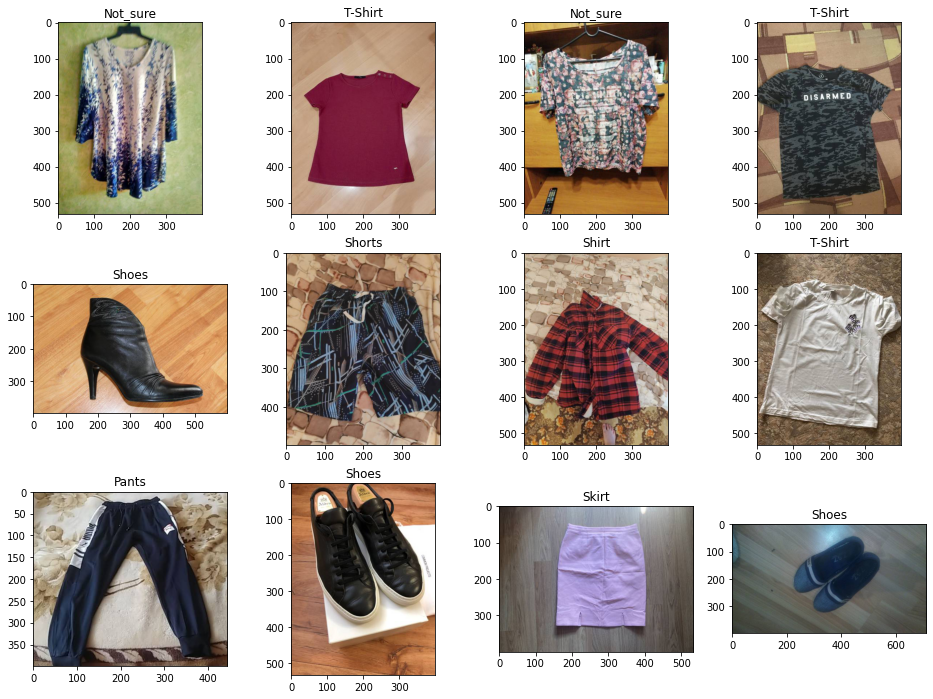

In [139]:
fig = plt.figure(figsize=(16, 12))
test_folder=path + r'/images'
for i in range(12):
    fig.add_subplot(3, 4, i+1)
    image = plt.imread(os.path.join(test_folder, label_df["image"][i]))
    plt.title(labels["label_cat"][i])
    plt.imshow(image)
plt.show()

In [140]:
labels

,image,sender_id,label,kids,label_cat
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,124,Not_sure,False,Not_sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,148,T-Shirt,False,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,94,Not_sure,False,Not_sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,43,T-Shirt,False,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,189,Shoes,False,Shoes
...,...,...,...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103.jpg,204,Shorts,False,Shorts
5399,befa14be-8140-4faf-8061-1039947e329d.jpg,204,Body,True,Body
5400,5379356a-40ee-4890-b416-2336a7d84061.jpg,310,Shorts,False,Shorts
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg,204,Shoes,False,Shoes


In [141]:
#Gorup by label (20 classes)
df = pd.DataFrame(labels['label_cat'])
df

,label_cat
0,Not_sure
1,T-Shirt
2,Not_sure
3,T-Shirt
4,Shoes
...,...
5398,Shorts
5399,Body
5400,Shorts
5401,Shoes


In [142]:
y = pd.DataFrame(df['label_cat'][:len(df)])
y.index

RangeIndex(start=0, stop=5403, step=1)

In [182]:
y

0       Not_sure
1        T-Shirt
2       Not_sure
3        T-Shirt
4          Shoes
          ...   
5398      Shorts
5399        Body
5400      Shorts
5401       Shoes
5402       Skirt
Name: label_cat, Length: 5403, dtype: object

In [183]:
y.unique()

array(['Not_sure', 'T-Shirt', 'Shoes', 'Shorts', 'Shirt', 'Pants',
       'Skirt', 'Other', 'Top', 'Outwear', 'Dress', 'Body', 'Longsleeve',
       'Undershirt', 'Hat', 'Polo', 'Blouse', 'Hoodie', 'Skip', 'Blazer'],
      dtype=object)

In [191]:
y2= pd.get_dummies(y, drop_first = True)

In [193]:
y2

,Blouse,Body,Dress,Hat,Hoodie,Longsleeve,Not_sure,Other,Outwear,Pants,Polo,Shirt,Shoes,Shorts,Skip,Skirt,T-Shirt,Top,Undershirt
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5399,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5400,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5401,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [198]:
new_data = pd.concat([labels, y2], axis = 1)

In [199]:
new_data

,image,sender_id,label,kids,label_cat,Blouse,Body,Dress,Hat,Hoodie,...,Pants,Polo,Shirt,Shoes,Shorts,Skip,Skirt,T-Shirt,Top,Undershirt
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,124,Not_sure,False,Not_sure,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,148,T-Shirt,False,T-Shirt,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,94,Not_sure,False,Not_sure,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,43,T-Shirt,False,T-Shirt,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,189,Shoes,False,Shoes,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103.jpg,204,Shorts,False,Shorts,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5399,befa14be-8140-4faf-8061-1039947e329d.jpg,204,Body,True,Body,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5400,5379356a-40ee-4890-b416-2336a7d84061.jpg,310,Shorts,False,Shorts,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg,204,Shoes,False,Shoes,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [200]:
print(new_data.columns)

Index(['image', 'sender_id', 'label', 'kids', 'label_cat', 'Blouse', 'Body',
       'Dress', 'Hat', 'Hoodie', 'Longsleeve', 'Not_sure', 'Other', 'Outwear',
       'Pants', 'Polo', 'Shirt', 'Shoes', 'Shorts', 'Skip', 'Skirt', 'T-Shirt',
       'Top', 'Undershirt'],
      dtype='object')


In [201]:
new_data.drop(['image', 'sender_id', 'label', 'kids'], axis = 1, inplace = True)

In [202]:
new_data

,label_cat,Blouse,Body,Dress,Hat,Hoodie,Longsleeve,Not_sure,Other,Outwear,Pants,Polo,Shirt,Shoes,Shorts,Skip,Skirt,T-Shirt,Top,Undershirt
0,Not_sure,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,T-Shirt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Not_sure,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,T-Shirt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Shoes,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,Shorts,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5399,Body,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5400,Shorts,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5401,Shoes,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [203]:
y_data = new_data['label_cat']

In [204]:
x_data = new_data.drop('label_cat', axis = 1)

In [206]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [207]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [208]:
from sklearn.metrics import classification_report
classification_report(y_test_data, predictions)

'              precision    recall  f1-score   support\n\n      Blazer       1.00      1.00      1.00        42\n      Blouse       1.00      1.00      1.00        10\n        Body       1.00      1.00      1.00        27\n       Dress       1.00      1.00      1.00       104\n         Hat       1.00      1.00      1.00        51\n      Hoodie       1.00      1.00      1.00        36\n  Longsleeve       1.00      1.00      1.00       184\n    Not_sure       1.00      1.00      1.00        66\n       Other       1.00      1.00      1.00        18\n     Outwear       1.00      1.00      1.00        98\n       Pants       1.00      1.00      1.00       203\n        Polo       1.00      1.00      1.00        45\n       Shirt       1.00      1.00      1.00       116\n       Shoes       1.00      1.00      1.00       124\n      Shorts       1.00      1.00      1.00        93\n        Skip       1.00      1.00      1.00         5\n       Skirt       1.00      1.00      1.00        49\n     T-

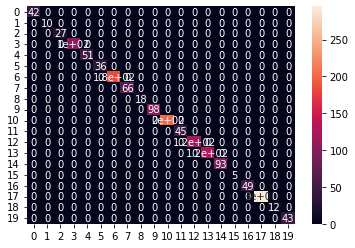

In [210]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test_data, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [184]:
y1 = np.zeros([y.shape[0], len(y.unique())])
y1 = pd.DataFrame(y1)
X = pd.concat([pd.Series(1, index=y.index, name='00'), y], axis=1)